In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import a,b,c,w,x,y,z,g,h
import sympy as sp

In [6]:
def s21_symbolic(w, H, **kwargs):
    gamma_1 = kwargs.get('gamma_1', a)
    gamma_2 = kwargs.get('gamma_2', b)
    gamma_r = kwargs.get('gamma_r', c)
    alpha_1 = kwargs.get('alpha_1', 0)
    alpha_2 = kwargs.get('alpha_2', 0)
    alpha_r = kwargs.get('alpha_r', 0)
    omega_1 = kwargs.get('omega_1', x)
    omega_2 = kwargs.get('omega_2', y)
    omega_r = kwargs.get('omega_r', z)
    g1 = kwargs.get('g1', g)
    g2 = kwargs.get('g2', h)
    tomega_1 = omega_1 - 1j*(alpha_1+gamma_1)
    tomega_2 = omega_2 - 1j*(alpha_2+gamma_2)
    tomega_r = omega_r - 1j*(alpha_r+gamma_r)


    M = sp.Matrix([[w-tomega_1,-g1+1j*sp.sqrt(gamma_1*gamma_r),1j*sp.sqrt(gamma_1*gamma_2)],[-g1+1j*sp.sqrt(gamma_1*gamma_r),w-tomega_r,-g2+1j*sp.sqrt(gamma_2*gamma_r)],[1j*sp.sqrt(gamma_1*gamma_2),-g2+1j*sp.sqrt(gamma_2*gamma_r),w-tomega_2]]) * 1j
    B = sp.Matrix([[sp.sqrt(gamma_1), sp.sqrt(gamma_r), sp.sqrt(gamma_2)]]).T * sp.sqrt(2)
    return M

print(s21_symbolic(w, 1))#, gamma_1=a, gamma_2=b, gamma_r=c,))

Matrix([[1.0*I*(1.0*I*a + w - x), 1.0*I*(-g + 1.0*I*sqrt(a*c)), -1.0*sqrt(a*b)], [1.0*I*(-g + 1.0*I*sqrt(a*c)), 1.0*I*(1.0*I*c + w - z), 1.0*I*(-h + 1.0*I*sqrt(b*c))], [-1.0*sqrt(a*b), 1.0*I*(-h + 1.0*I*sqrt(b*c)), 1.0*I*(1.0*I*b + w - y)]])


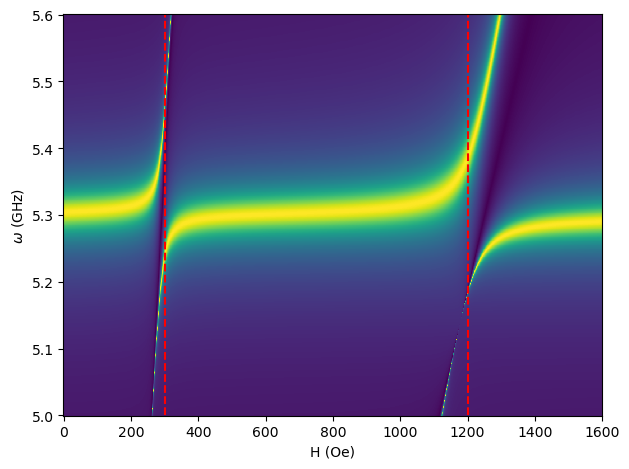

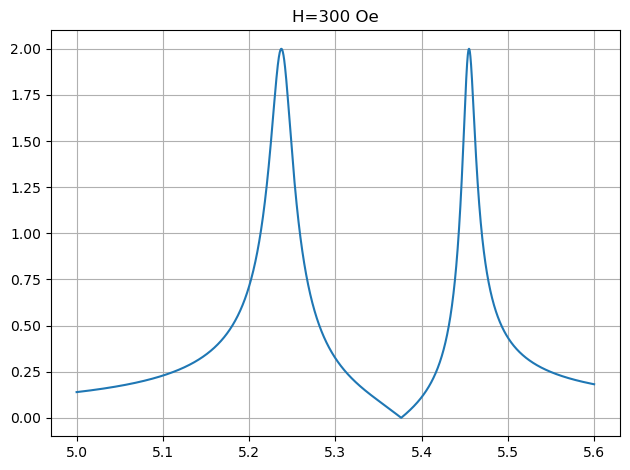

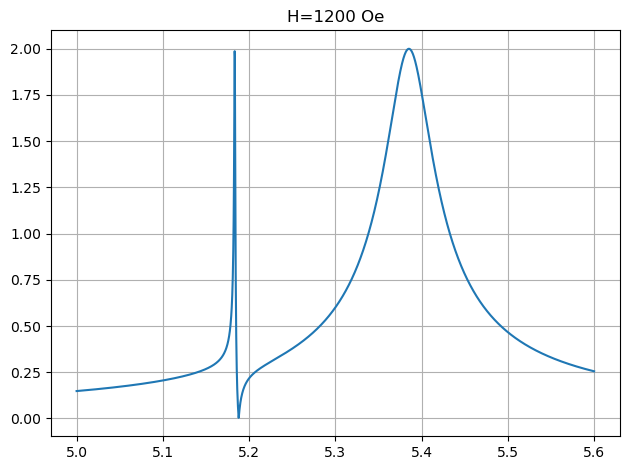

In [7]:
def s21(w, H, **kwargs):
    gyro1 = kwargs.get('gyro1', 2.94e-3)
    gyro2 = kwargs.get('gyro2', 1.76e-2/2/np.pi)
    M1 = kwargs.get('M1', 10900) # Py
    M2 = kwargs.get('M2', 1750) # YIG

    gamma_1 = kwargs.get('gamma_1', .0001)
    gamma_2 = kwargs.get('gamma_2', .008)
    gamma_r = kwargs.get('gamma_r', .02)

    alpha_1 = kwargs.get('alpha_1', 0)
    alpha_2 = kwargs.get('alpha_2', 0)
    alpha_r = kwargs.get('alpha_r', 0)

    omega_1 = gyro1*np.sqrt(H*(H+M1))
    omega_2 = gyro2*np.sqrt(H*(H+M2))
    omega_r = kwargs.get('omega_r', 5.3)

    g1 = kwargs.get('g1', .1)
    g2 = kwargs.get('g2', .1)

    tomega_1 = omega_1 - 1j*(alpha_1+gamma_1)
    tomega_2 = omega_2 - 1j*(alpha_2+gamma_2)
    tomega_r = omega_r - 1j*(alpha_r+gamma_r)


    M = np.array([[w-tomega_1,-g1+1j*np.sqrt(gamma_1*gamma_r),1j*np.sqrt(gamma_1*gamma_2)],[-g1+1j*np.sqrt(gamma_1*gamma_r),w-tomega_r,-g2+1j*np.sqrt(gamma_2*gamma_r)],[1j*np.sqrt(gamma_1*gamma_2),-g2+1j*np.sqrt(gamma_2*gamma_r),w-tomega_2]]) * 1j
    B = np.array([[np.sqrt(gamma_1), np.sqrt(gamma_r), np.sqrt(gamma_2)]]).T * np.sqrt(2)

    return B.T @ np.linalg.inv(M) @ B
    # return M

# print(s21(5.4, 1))#, gamma_1=a, gamma_2=b, gamma_r=c,)

def plot_s21(H, **kwargs):
    w = np.linspace(5,5.6,3000)
    # H = H
    s21s = [s21(ww, H, **kwargs)[0,0] for ww in w]
    plt.plot(w, np.abs(s21s))
    plt.title(f'H={H} Oe')
    plt.grid()
    plt.tight_layout()
    plt.show()

def plot_2d_s21(**kwargs):
    w = np.linspace(5,5.6,500)
    H = np.linspace(0, 1.6, 1500)*1e3
    s21s = np.array([[s21(ww, hh, **kwargs)[0,0] for hh in H] for ww in w])
    plt.pcolormesh(H, w, np.abs(s21s))#, extent=[w[0], w[-1], H[0], H[-1]], aspect='auto')
    plt.vlines(300, w[0], w[-1], color='r', linestyle='--')
    plt.vlines(1200, w[0], w[-1], color='r', linestyle='--')
    plt.xlabel('H (Oe)')
    plt.ylabel('$\\omega$ (GHz)')
    plt.tight_layout()
    plt.show()
    # plt.savefig("s21_selections.png")
    plt.close()

HH1, HH2 = 300, 1200

plot_2d_s21()
plot_s21(HH1)
plot_s21(HH2)

In [8]:
def s21_couplings(**kwargs):
    w = np.linspace(5,5.6,500)
    s21_1 = np.array([np.abs(s21(ww, HH1, **kwargs)[0,0]) for ww in w])
    s21_2 = np.array([np.abs(s21(ww, HH2, **kwargs)[0,0]) for ww in w])

    peak_indices_1 = np.where((s21_1[1:-1] > s21_1[:-2]) & (s21_1[1:-1] > s21_1[2:]))[0] + 1
    peak_x_values_1 = w[peak_indices_1]
    peak_diff_1 = np.diff(peak_x_values_1)
    # print("Differences between peaks in s21_1:", peak_diff_1)

    peak_indices_2 = np.where((s21_2[1:-1] > s21_2[:-2]) & (s21_2[1:-1] > s21_2[2:]))[0] + 1
    peak_x_values_2 = w[peak_indices_2]
    peak_diff_2 = np.diff(peak_x_values_2)

    if len(peak_diff_1) == 0:
        print(peak_x_values_1)
        peak_diff_1 = [0]
    if len(peak_diff_2) == 0:
        print(peak_x_values_2)
        peak_diff_2 = [0]

    # print("Differences between peaks in s21_1:", peak_diff_2)
    # return s21s
    return peak_diff_1, peak_diff_2

s21_couplings(g1=.1,g2=.1)

(array([0.21763527]), array([0.20200401]))

In [9]:
g1_arr = np.linspace(.001,.2,10)
g2_arr = np.linspace(.001,.2,10)
diffs = np.array([[s21_couplings(g1=g1, g2=g2) for g1 in g1_arr] for g2 in g2_arr])[...,0]

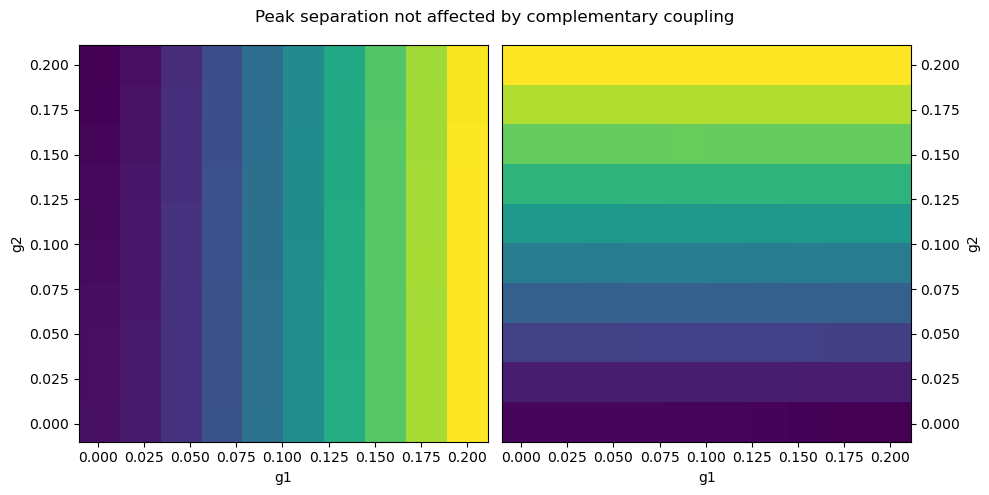

In [10]:
# print(diffs)
fig, axs = plt.subplots(1,2,sharey=False,figsize=(10,5))
axs[0].pcolormesh(g1_arr, g2_arr, diffs[...,0])
axs[0].set_xlabel('g1')
axs[0].set_ylabel('g2')
# axs[0].title('Difference between peaks in s21_1')
# axs[0].colorbar()
# plt.show()
# print(diffs)
axs[1].pcolormesh(g1_arr, g2_arr, diffs[...,1])
axs[1].set_xlabel('g1')
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_ylabel('g2')
# axs[1].title('Difference between peaks in s21_2')
# axs[1].colorbar()
fig.suptitle("Peak separation not affected by complementary coupling")
fig.tight_layout()
plt.show()

In [11]:
l1_arr = np.linspace(0,.31/2**.5,150)
# gamma1_arr = 2*np.pi*l1_arr**2
gamma1_arr = np.linspace(0.05,.12,150)
l2_arr = np.linspace(0,1,50)
gamma2_arr = 2*np.pi*l2_arr**2
# gamma2_arr = np.linspace(0.05,.15,50)
diffs = np.array([[s21_couplings(gamma_1=gamma1, gamma_2=gamma2) for gamma1 in gamma1_arr] for gamma2 in gamma2_arr])[...,0]
# diffs = np.array([[s21_couplings(g1=l1, l2=l2) for l1 in l1_arr] for l2 in l2_arr])[...,0]

KeyboardInterrupt: 

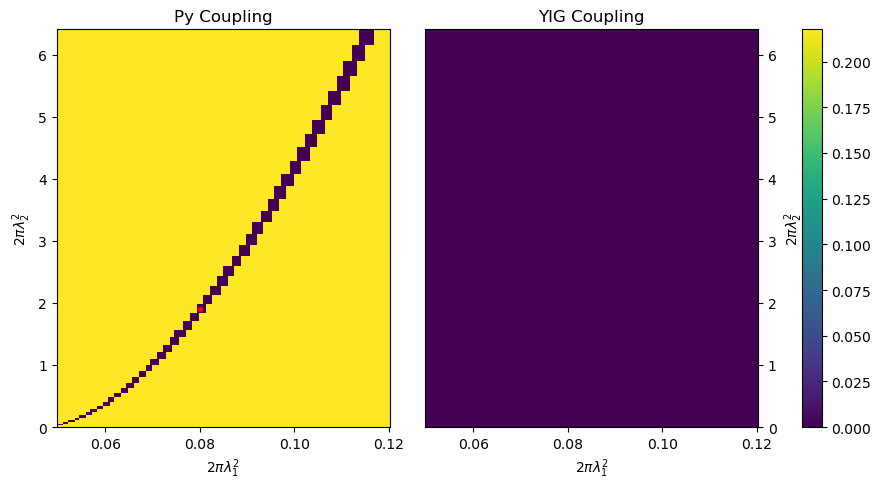

In [ ]:
fig, axs = plt.subplots(1,2,sharey=False,figsize=(10,5))
axs[0].pcolormesh(gamma1_arr, gamma2_arr, diffs[...,0])
axs[0].set_xlabel('$2\\pi\\lambda_1^2$')
axs[0].set_ylabel('$2\\pi\\lambda_2^2$')
# axs[0].title('Difference between peaks in s21_1')
# axs[0].colorbar()
# plt.show()
# print(diffs)
axs[1].pcolormesh(gamma1_arr, gamma2_arr, diffs[...,1])
axs[1].set_xlabel('$2\\pi\\lambda_1^2$')
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_ylabel('$2\\pi\\lambda_2^2$')
# axs[1].title('Difference between peaks in s21_2')
# axs[1].colorbar()
axs[0].set_title('Py Coupling')
axs[0].plot(.08,1.9,'r.')
axs[1].set_title('YIG Coupling')
# fig.suptitle("Peak separation not affected by damping")
fig.tight_layout()
fig.colorbar(axs[0].collections[0], ax=axs, location="right", use_gridspec=False)
plt.savefig("couplings.png")

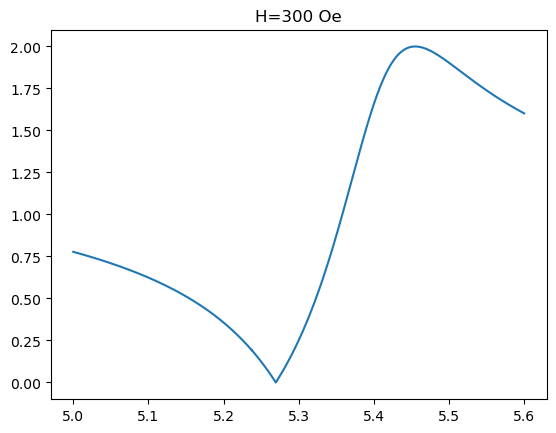

In [ ]:
plot_s21(HH1, gamma_1=.08, gamma_2=1.9)

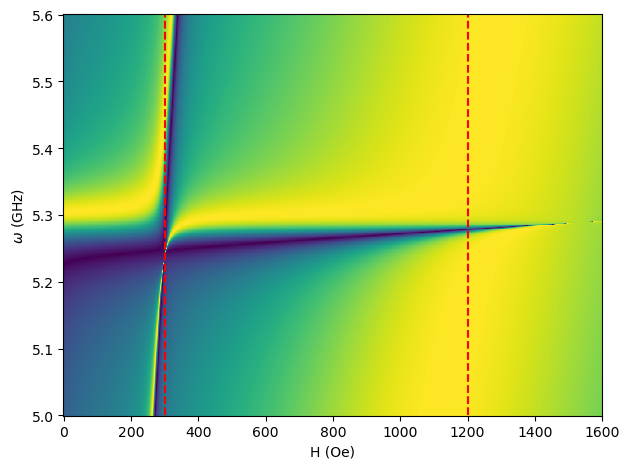

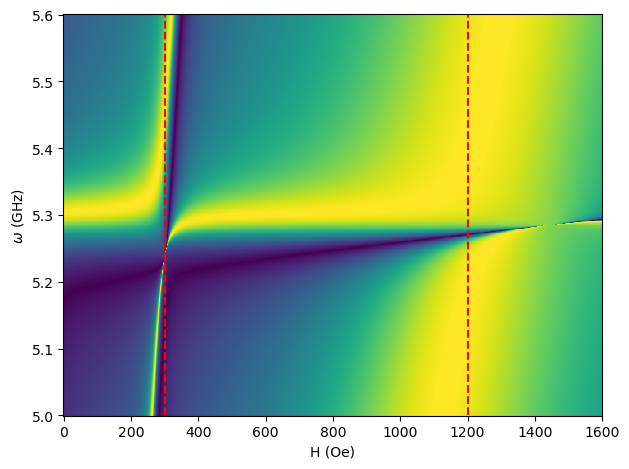

In [ ]:
plot_2d_s21(gamma_1=.08, gamma_2=1.9)

In [ ]:
plot_2d_s21(gamma_1=.08, gamma_2=1)

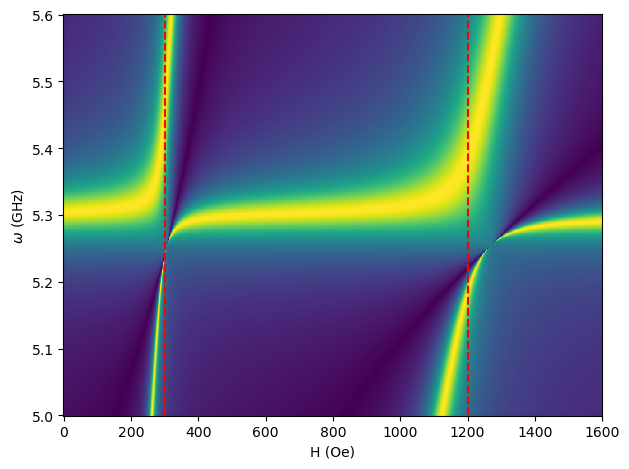

In [ ]:
plot_2d_s21(gamma_1=.08, gamma_2=.1)